In [2]:
###
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Pregratirea datelor: descarcare, extragere, preprocesarea, organizarea setului de date

In [3]:
#download historical bitcoin data
bitcoin_data=yf.download('BTC-USD', start='2023-11-23',end='2024-11-22')

#etract the closing prices as the target variable
bitcoin_prices=bitcoin_data['Close'].values.reshape(-1,1)

#create a future matrix with consecutive numbers as features
X=np.arange(len(bitcoin_prices)).reshape(-1,1)

#split the data into trainig and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, bitcoin_prices, test_size = 0.2, random_state = 42)


[*********************100%***********************]  1 of 1 completed


crearea si antrenarea modelului

In [4]:
# craete and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

reluarea modelului: infenta - predictie si evaluare

In [5]:
# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error:, {mse}')

Mean Squared Error:, 63944179.89402088


vizualizarea rezulatelor

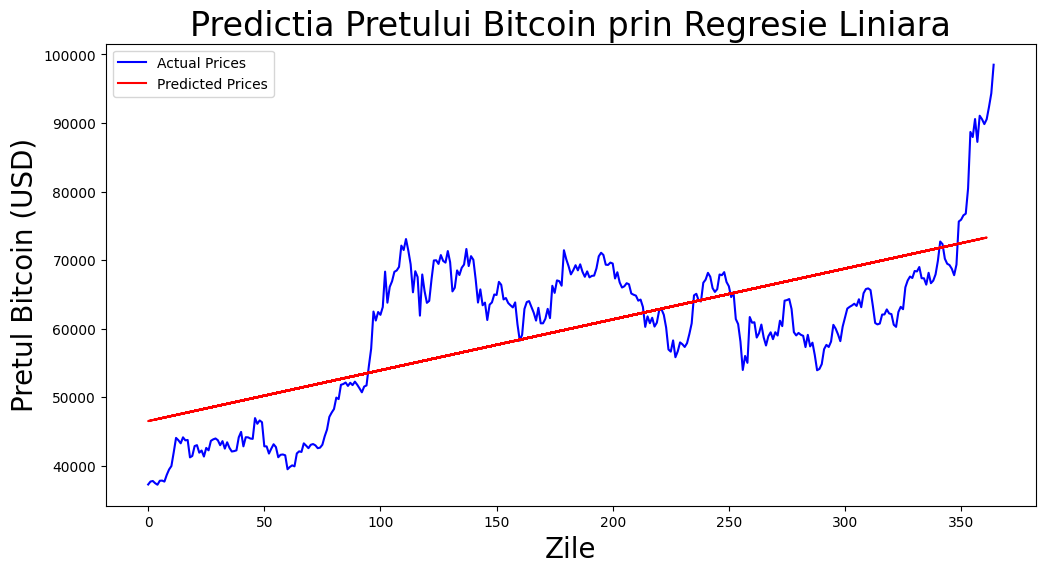

In [7]:
# plot the actual prices and predicted prices
plt.figure(figsize=(12,6))
plt.plot(X, bitcoin_prices, label='Actual Prices', color='blue')
plt.plot(X_test, y_pred, label='Predicted Prices', color='red')
plt.xlabel('Zile',fontsize=20)
plt.ylabel('Pretul Bitcoin (USD)',fontsize=20)
plt.title('Predictia Pretului Bitcoin prin Regresie Liniara',fontsize=24)
plt.legend()
plt.show()